age group vs imdb rating scatter plot

genre vs imdb rating set of histograms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').set_index('ID').drop('Unnamed: 0', axis = 1)
imdb = pd.read_csv('imdb.csv')
imdb['date_published'] = pd.to_datetime(imdb['date_published'], errors = 'coerce')
imdb.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [34]:
imdb_subset = imdb[['title','original_title','date_published','avg_vote','budget','usa_gross_income','worlwide_gross_income']]
streaming_subset = streaming[['Title','Genres','Age','Runtime','Country']]
streaming_subset['Streaming'] = streaming[['Netflix','Hulu','Prime Video','Disney+']].apply(sum,axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
joined = pd.merge(streaming_subset,imdb_subset, how = 'inner',right_on = 'original_title',left_on = 'Title')

In [36]:
display(joined.head(5))
len(joined) #7345 when using title, 10149 when using original title, started with 16744
joined['Age'].unique()
age_rating = pd.CategoricalDtype(['all','7+','13+','16+','18+','nan'])
joined.groupby('Age').agg([np.nanmean,np.std])

,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
0,Inception,"Action,Adventure,Sci-Fi,Thriller",13+,148.0,"United States,United Kingdom",1,Inception,Inception,2010-09-24,8.8,$ 160000000,$ 292576195,$ 869784991
1,The Matrix,"Action,Sci-Fi",18+,136.0,United States,1,Matrix,The Matrix,1999-05-07,8.7,$ 63000000,$ 171479930,$ 465718588
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",13+,149.0,United States,1,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,8.4,$ 321000000,$ 678815482,$ 2048359754
3,Back to the Future,"Adventure,Comedy,Sci-Fi",7+,116.0,United States,1,Ritorno al futuro,Back to the Future,1985-10-18,8.5,$ 19000000,$ 211406762,$ 388774684
4,Spider-Man: Into the Spider-Verse,"Animation,Action,Adventure,Family,Sci-Fi",7+,117.0,United States,1,Spider-Man: Un nuovo universo,Spider-Man: Into the Spider-Verse,2018-12-25,8.4,$ 90000000,$ 190241310,$ 375540831


Runtime            Streaming            avg_vote          
        nanmean        std   nanmean       std   nanmean       std
Age                                                               
13+  107.580184  24.848713  1.136778  0.363852  5.958764  1.203524
16+   97.549020  18.016418  1.090909  0.288418  5.203896  1.271605
18+   99.182398  18.656451  1.080360  0.283898  5.535345  1.243879
7+   104.623377  23.761924  1.073852  0.261661  5.894810  1.197881
all  103.783908  62.613762  1.054422  0.227106  6.093424  1.205509

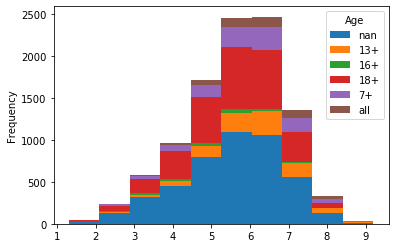

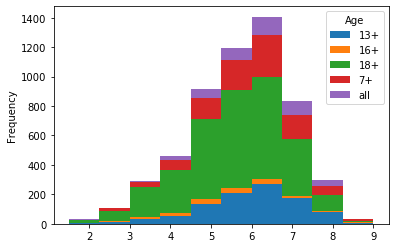

In [38]:
joined.pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)
joined.dropna(subset = ['Age']).pivot(columns = 'Age')['avg_vote'].plot(kind = 'hist', stacked=True)

In [39]:
genres = []
vals=[]
errors = []

for x in joined['Genres'].unique():
    gs = str(x).split(',')
    for gen in gs:
        if gen in genres:
            continue
        else:
            genres.append(gen)

for g in genres:
    movies = joined[joined['Genres'].map(lambda x: g in str(x))]
    vals.append(np.nanmean(movies['avg_vote']))
    errors.append(np.std(movies['avg_vote']))

<ErrorbarContainer object of 3 artists>

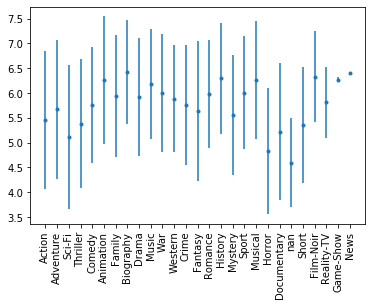

In [40]:
plt.xticks(rotation = 90)
plt.errorbar(genres, vals, errors,fmt = '.')

Text(0.5, 0, 'Runtime')

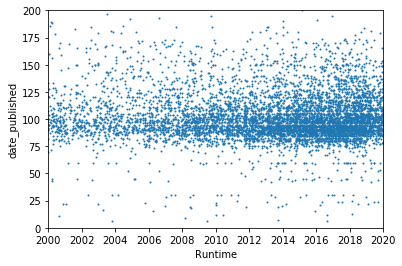

In [41]:
fig,ax = plt.subplots()
small = joined#.sample(500)
ax.scatter(small['date_published'],small['Runtime'], s=1)
ax.set_ylim(0,200)
ax.set_xlim('2000','2020')
# ax.set_xscale('symlog')
ax.set_ylabel('date_published')
ax.set_xlabel('Runtime')

In [42]:
## gross income and public perception

In [43]:
doll = joined[joined['budget'].map(lambda x: '$' in str(x))]

doll['worlwide_gross_income'] = doll['worlwide_gross_income'].map(lambda x : float(str(x).replace('$','')))
doll['usa_gross_income'] = doll['usa_gross_income'].map(lambda x : float(str(x).replace('$','')))

doll.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
0,Inception,"Action,Adventure,Sci-Fi,Thriller",13+,148.0,"United States,United Kingdom",1,Inception,Inception,2010-09-24,8.8,$ 160000000,292576195.0,8.697850e+08
1,The Matrix,"Action,Sci-Fi",18+,136.0,United States,1,Matrix,The Matrix,1999-05-07,8.7,$ 63000000,171479930.0,4.657186e+08
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",13+,149.0,United States,1,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,8.4,$ 321000000,678815482.0,2.048360e+09
3,Back to the Future,"Adventure,Comedy,Sci-Fi",7+,116.0,United States,1,Ritorno al futuro,Back to the Future,1985-10-18,8.5,$ 19000000,211406762.0,3.887747e+08
4,Spider-Man: Into the Spider-Verse,"Animation,Action,Adventure,Family,Sci-Fi",7+,117.0,United States,1,Spider-Man: Un nuovo universo,Spider-Man: Into the Spider-Verse,2018-12-25,8.4,$ 90000000,190241310.0,3.755408e+08


Text(0.5, 0, 'US income ($)')

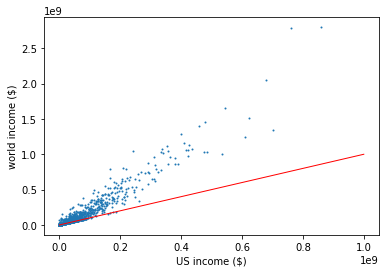

In [44]:
fig1,ax1 = plt.subplots()
ax1.scatter(doll['usa_gross_income'],doll['worlwide_gross_income'], s=1)
ax1.plot([0,1e9],[0,1e9], 'r', linewidth=1)
# ax.set_xlim('2000','2020')
# ax1.set_yscale('symlog')
# ax1.set_xscale('symlog')
ax1.set_ylabel('world income ($)')
ax1.set_xlabel('US income ($)')

In [45]:
doll['budget'] = doll['budget'].map(lambda x : float(str(x).replace('$','')))

doll[doll['budget']<1000000].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Genres,Age,Runtime,Country,Streaming,title,original_title,date_published,avg_vote,budget,usa_gross_income,worlwide_gross_income
69,The Evil Dead,Horror,18+,85.0,United States,1,La casa,The Evil Dead,1984-08-17,7.5,350000.0,2400000.0,2893091.0
115,Chasing Amy,"Comedy,Drama,Romance",18+,113.0,United States,1,In cerca di Amy,Chasing Amy,1997-04-18,7.2,250000.0,12021272.0,12021272.0
117,The Wicker Man,"Horror,Mystery,Thriller",18+,88.0,United Kingdom,1,The Wicker Man,The Wicker Man,1973-12-06,7.5,810000.0,60891.0,98201.0
133,Blue Ruin,"Crime,Drama,Thriller",18+,90.0,"United States,France",1,Blue Ruin,Blue Ruin,2014-07-09,7.1,420000.0,258384.0,993313.0
164,Freaks,"Drama,Mystery,Sci-Fi,Thriller",18+,105.0,"Canada,United States",1,Freaks,Freaks,1932-02-20,7.9,310607.0,NaN,4072.0


Text(0.5, 0, 'vote')

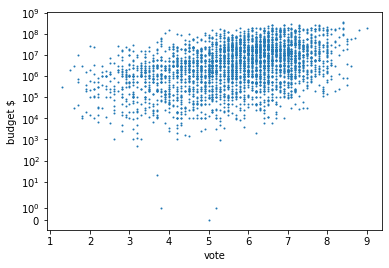

In [46]:
fig1,ax1 = plt.subplots()
ax1.scatter(doll['avg_vote'],doll['budget'], s=1)
# ax.set_xlim('2000','2020')
ax1.set_yscale('symlog')
ax1.set_ylabel('budget $')
ax1.set_xlabel('vote')

In [47]:
platforms = ['Netflix','Hulu','Prime Video','Disney+']

platvals=[]
platerrors = []

for plat in platforms:
    movies = streaming[streaming[plat]==1]
    platvals.append(np.nanmean(movies['IMDb']))
    platerrors.append(np.std(movies['IMDb']))

<ErrorbarContainer object of 3 artists>

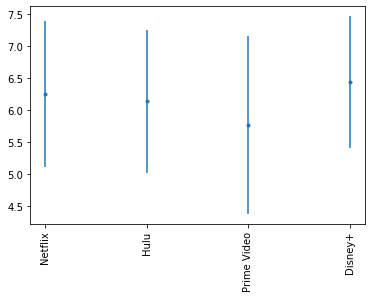

In [48]:
plt.xticks(rotation = 90)
plt.errorbar(platforms, platvals, platerrors,fmt = '.')

Text(0.5, 0, 'vote')

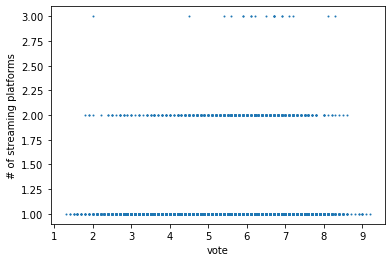

In [52]:
fig2,ax2 = plt.subplots()
ax2.scatter(joined['avg_vote'],joined['Streaming'], s=1)
ax2.set_ylabel('# of streaming platforms')
ax2.set_xlabel('vote')

In [54]:
joined.groupby('Streaming').agg([np.nanmean, np.std])['avg_vote']

,nanmean,std
Streaming,,
1,5.609963,1.284162
2,5.825072,1.212479
3,6.275000,1.328186
